# Programa para plotar o domínio das grades do modelo e topografia

In [1]:
%matplotlib inline

In [2]:
import pygmt
import os
import geopandas as gpd
import numpy as np

In [3]:
rmsp = os.path.join("Shapefile", "filename.shp") # shapefile da RMSP
gdf = gpd.read_file(rmsp)


grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.6 original at 15x15 arc seconds [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 10x10 degree grid tile (earth_relief_15s_p): S40W060


In [ ]:
grid1=[-55.8, -38.2, -31.4, -16.2] # Dominio da grade com 16 km de resolucao
grid2=[-51.1, -42.3, -27.5, -19.6] # Dominio da grade com 4 km de resolucao
grid3=[-48.5, -44.5, -25.4, -21.8] # Dominio da grade com 1 km de resolucao
grid_brams = pygmt.datasets.load_earth_relief(resolution="15s", region=grid1) #dados de topografia com resolução de 15s

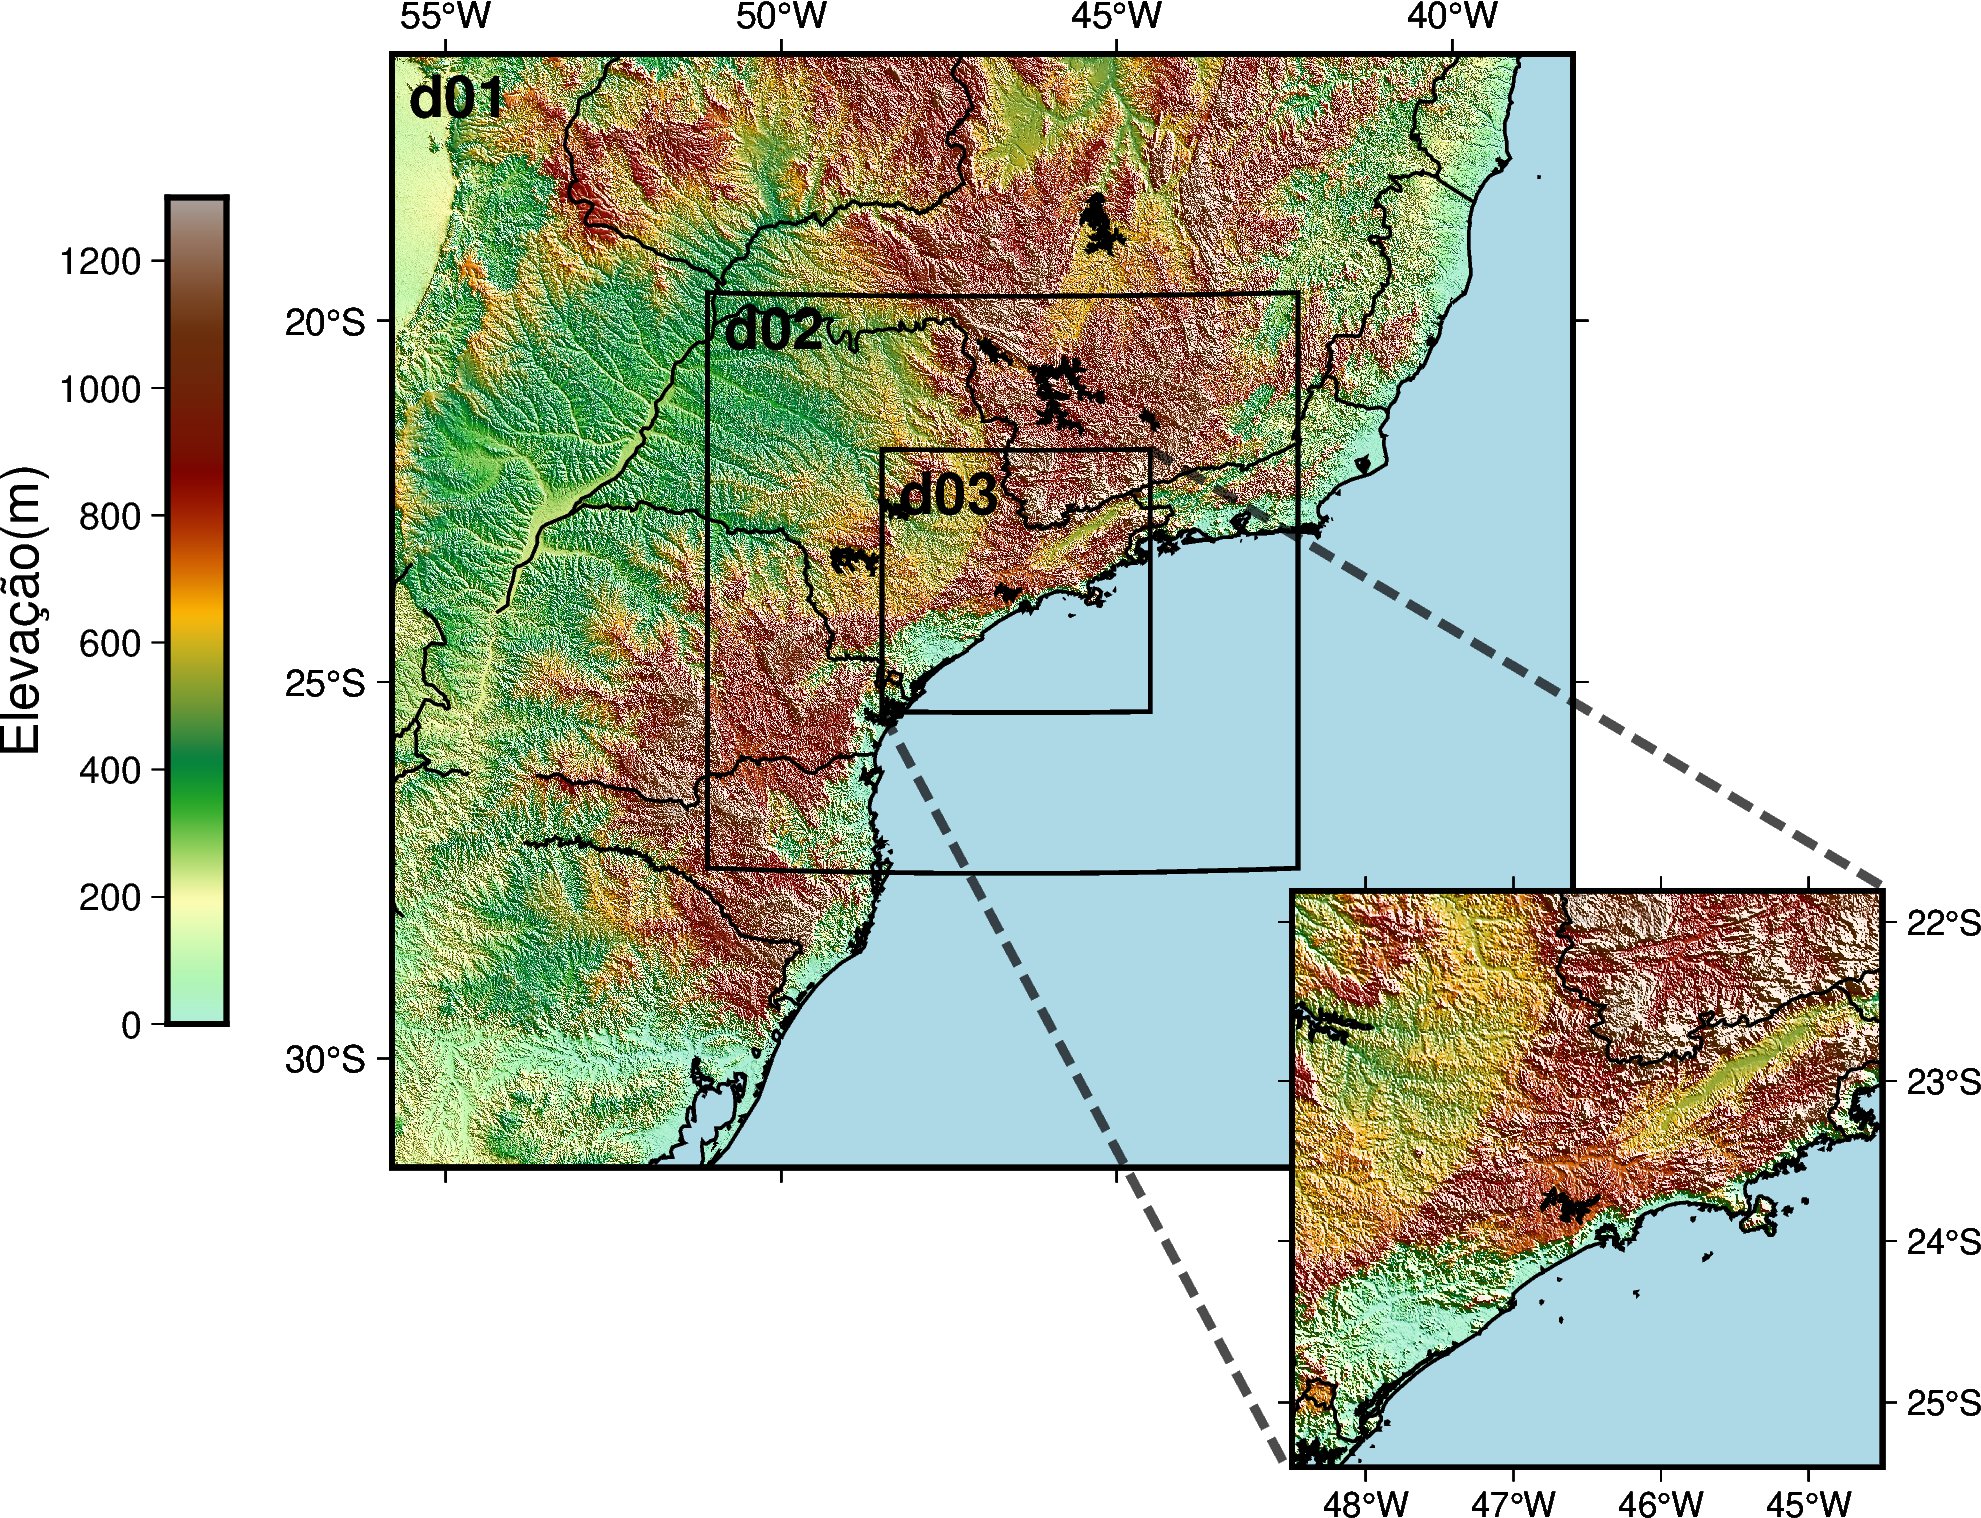

In [4]:
fig = pygmt.Figure()
pygmt.makecpt(
    cmap='earth',
    series='0/1500',
)
pygmt.config(MAP_FRAME_TYPE="plain")
fig.grdimage(grid=grid_brams,region=grid1, projection="M-55/-28/10c", frame=['x5','y5', 'NWse'], shading="+a45+nt3.0")
fig.coast(
    region=grid1, water="lightblue",
    borders="2/thin",  # Plota fronteiras dos estados
    shorelines="thin",  # Plot a linha de costa P
    projection="M10c",  # Projeção Mercator, tamanho de 10 cm
    frame=['x5','y5', 'NWse'],  # Espaçamento e localização dos ticks
)
fig.text(text=["d01"], x=-54.8, y=-16.8, font="14p,Helvetica-Bold,black")
rectangle = [[grid2[0], grid2[2], grid2[1], grid2[3]]]
fig.plot(data=rectangle, style="r+s", pen="1p,black")
fig.text(text=["d02"], x=-50.1, y=-20.1, font="14p,Helvetica-Bold,black")
rectangle_grid3 = [[grid3[0], grid3[2], grid3[1], grid3[3]]]
fig.plot(data=rectangle_grid3, style="r+s", pen="1p,black")
fig.text(text=["d03"], x=-47.5, y=-22.4, font="14p,Helvetica-Bold,black")
vectors = [[-44.5, -21.8, 121, 7.2]]
vectors2 = [[-48.5, -25.4, 152, 7.2]]
fig.plot(data = vectors,
             fill = 'black',
             style = 'V0c+e',
             pen = '2.1,black,6_3:0p',
             transparency = '30',
             no_clip = True)
fig.plot(data = vectors2,
             fill = 'black',
             style = 'V0c+e',
             pen = '2.1,black,6_3:0p',
             transparency = '30',
             no_clip = True)
fig.colorbar(frame=["a200", "x+lElevação(m)"],position= "JML+o1.4c/0c+w7c/0.5c", truncate=[0, 1300])
fig.shift_origin(xshift = '3.0i', 
                 yshift = '-1.0i')
fig.grdimage(grid=grid_brams,region=grid3, projection="M-55/-28/5c", frame=['x1','y1', 'SEnw'], shading="+a45+nt3.0")
fig.coast(
    region=grid3, water="lightblue",
    borders="2/thin",  
    shorelines="thin",  
    projection="M5c",  # Projeção Mercator, tamanho de 5 cm 
    frame=['x1','y1', 'SEnw'],  
)
fig.savefig("topo_grades_Portugues.png", crop=True, dpi=300)
fig.show()